In [66]:
%matplotlib inline
import pandas
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix

In [91]:
data = pandas.read_csv("/var/www/vizz.site/data/redmond-transactions.csv", parse_dates=[0])
data['document_timestamp'] = data['document_date'].astype(np.int64)
data = data.where(data['sale_price'] < 2000000)
data = data.where(data['sale_price'] > 1000)
data = data.where(data['document_date'] >= '1991-01-01')
data = data.where(data['sq_ft_tot_living'] <= 10000)
data = data.where(data['bedrooms'] <= 8)

In [116]:
data.describe(include='all').transpose().fillna('')[['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', 'max']]

,count,unique,top,freq,mean,std,min,max
document_date,31410,6678,2003-03-14 00:00:00,40,,,,
sale_price,31410,,,,450186,263564,1070,1.995e+06
sale_reason,31410,,,,1.63391,2.7994,0,19
sale_instrument,31410,,,,3.36673,2.82886,0,27
sale_warning,5474,282,45,1166,,,,
sitetype,31410,11,R1,30434,,,,
addr_full,31410,16220,2140 W LAKE SAMMAMISH PKWY NE,10,,,,
zip5,31410,,,,98052.5,2.29209,98027,98074
ctyname,17317,2,REDMOND,17076,,,,
postalctyn,31410,2,REDMOND,31318,,,,


In [60]:
data["present_use"].value_counts()

2      32563
29      1185
300      182
3         56
6         20
0          7
8          6
4          5
130        3
9          1
Name: present_use, dtype: int64

In [93]:
df = pandas.DataFrame(data, columns=['sale_price', 'document_timestamp', 'bedrooms', 'yr_built', 'sq_ft_tot_living', 'bldg_grade'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f3f646d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f97f0f1b828>]], dtype=object)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


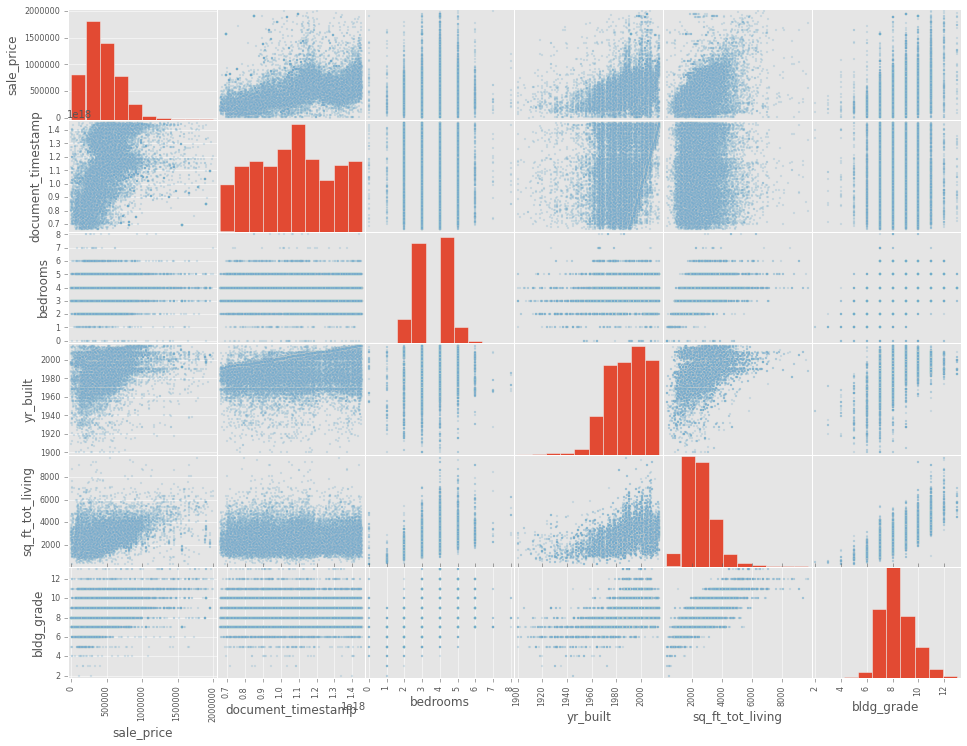

In [94]:
scatter_matrix(df, alpha=0.2, figsize=(16, 12), diagonal='hist')

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


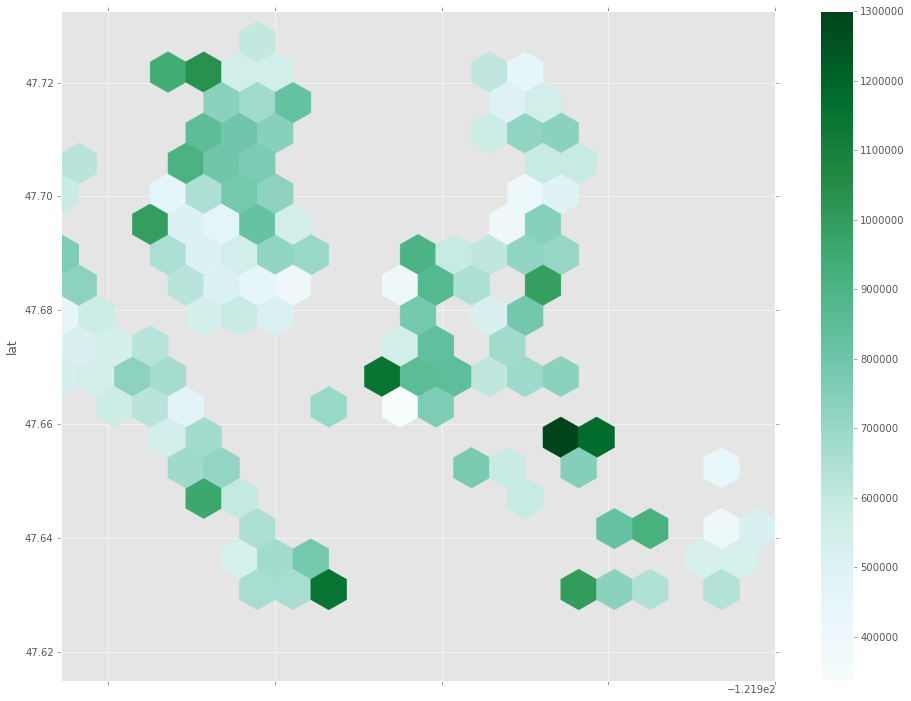

In [102]:
data.where(data['document_date'] >= '2014-01-01').where(data['lat'] > 47.6).plot(kind='hexbin', mincnt=5, figsize=(16, 12), x='lon', y='lat', C='sale_price', reduce_C_function=np.median, gridsize=20)